# Plynomial Linear Regression

In [2]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os



In [3]:
os.listdir('Polynomial')

['.DS_Store',
 'Regression_Template',
 'Polynomial Regression.ipynb',
 '.ipynb_checkpoints',
 'Polynomial_Regression']

In [7]:
# Importing the dataset
dataset = pd.read_csv('Polynomial_Regression/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
# Separate between dependent and independent
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print('X: \n{}'.format(X))
print('y: \n{}'.format(y))

X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y: 
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Such a small data set, so it does not make sense to split between train/test

In [4]:
# Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

### Fitting linear regression

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
# This creates new dependent variables - 
# raising by the number of degrees required
# in this case, it will take x1, and create x1^2, x1^3 etc

pol_reg = PolynomialFeatures(degree=4)
X_poly = pol_reg.fit_transform(X)
print('X: \n{}'.format(X))
print('X_poly: \n{}'.format(X_poly))

X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
X_poly: 
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00]
 [  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
    1.60000000e+01]
 [  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.70000000e+01
    8.10000000e+01]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01
    2.56000000e+02]
 [  1.00000000e+00   5.00000000e+00   2.50000000e+01   1.25000000e+02
    6.25000000e+02]
 [  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02
    1.29600000e+03]
 [  1.00000000e+00   7.00000000e+00   4.90000000e+01   3.43000000e+02
    2.40100000e+03]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02
    4.09600000e+03]
 [  1.00000000e+00   9.00000000e+00   8.10000000e+01   7.29000000e+02
    6.56100000e+03]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
    1.00000000e+04]]


In [33]:
# Create polynomial linear regression model
pol_lin_reg = LinearRegression()
pol_lin_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualising the models

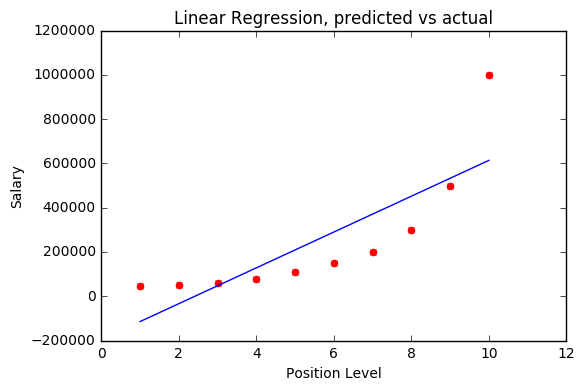

In [34]:
# Linear regression
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression, predicted vs actual')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

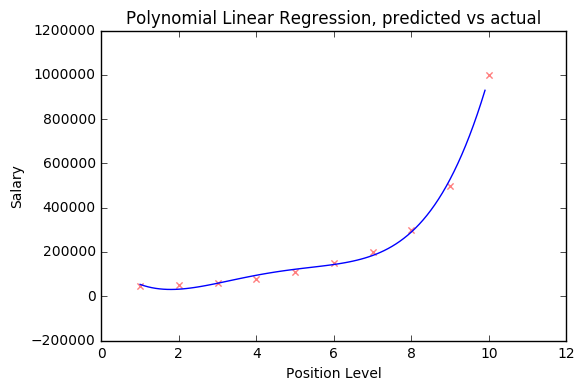

In [36]:
# Polynomial regression

# Higher resolution X (creates more values in X. )
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

# Plot the graphs
plt.scatter(X, y, color='red', marker='x', alpha=0.5)
gen_pol = pol_reg.fit_transform(X_grid)
plt.plot(X_grid, pol_lin_reg.predict(gen_pol), color='blue')
plt.title('Polynomial Linear Regression, predicted vs actual')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()